In [ ]:
pip install --upgrade tensorflow


In [ ]:
pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner
from keras_tuner import HyperParameters
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path_X_train = '/content/drive/MyDrive/NN_Classification/Datasets/Alle_Kranten/alle_kranten_X_train.csv'
df_X_train = pd.read_csv(file_path_X_train)

file_path_X_test = '/content/drive/MyDrive/NN_Classification/Datasets/Alle_Kranten/alle_kranten_X_test.csv'
df_X_test = pd.read_csv(file_path_X_test)

file_path_y_train = '/content/drive/MyDrive/NN_Classification/Datasets/Alle_Kranten/alle_kranten_y_train.csv'
df_y_train = pd.read_csv(file_path_y_train)

file_path_y_test = '/content/drive/MyDrive/NN_Classification/Datasets/Alle_Kranten/alle_kranten_y_test.csv'
df_y_test = pd.read_csv(file_path_y_test)

df_X_train


,brand,num_words,num_paragraphs,author_ids,main_section,date,sin_time,cos_time,jaar,maand,...,sportlocatie,economie_,milieuvervuiling,terreurdaad,groep ouders,religieuze leider,wetenschappelijke instelling,discriminatie,ceremonie,subsections_labels
0,39.081498,519,15,37.201811,38.361452,1719915649,5.000000e-01,-8.660254e-01,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,37.869839
1,39.081498,589,12,28.718683,38.361452,1723303250,-7.071068e-01,-7.071068e-01,1,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,29.177143
2,91.414292,651,12,33.919655,52.256121,1719255468,-1.000000e+00,-1.836970e-16,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.4937,0.0,48.498902
3,39.081498,51,2,47.473046,38.361452,1718626278,1.224647e-16,-1.000000e+00,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,41.440755
4,33.430304,597,12,25.577715,28.356042,1724752485,7.071068e-01,-7.071068e-01,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,44.887737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170767,33.430304,670,15,34.369149,38.361452,1715050809,7.071068e-01,7.071068e-01,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,37.463597
170768,94.025736,315,7,103.961819,143.722583,1722974448,-8.660254e-01,5.000000e-01,0,0,...,0.0,0.5995,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,109.853075
170769,33.430304,945,23,41.127832,38.361452,1720109791,-8.660254e-01,-5.000000e-01,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,44.598765
170770,33.430304,386,10,34.852460,38.361452,1726831553,2.588190e-01,-9.659258e-01,1,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,44.598765


In [ ]:
bins = [0, 12, 24, 48, 96, np.inf]
labels = ['Dagdeel', '24 uur', '48 uur', '4 dagen', '4 dagen <']
df_y_train['relevance_in_class'] = pd.cut(df_y_train['relevance_window_in_hours'], bins= bins, labels=labels)
df_y_test['relevance_in_class'] = pd.cut(df_y_test['relevance_window_in_hours'], bins= bins, labels=labels)

df_y_test

,relevance_window_in_hours,relevance_in_class
0,22.0,24 uur
1,5.0,Dagdeel
2,73.0,4 dagen
3,17.0,24 uur
4,25.0,48 uur
...,...,...
42689,12.0,Dagdeel
42690,85.0,4 dagen
42691,24.0,24 uur
42692,41.0,48 uur


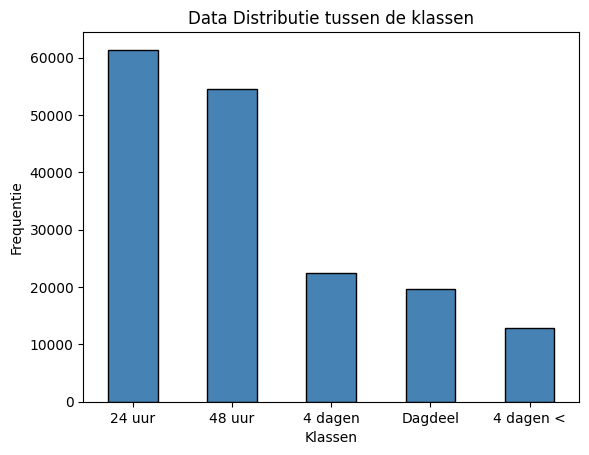

In [ ]:
category_counts = df_y_train['relevance_in_class'].value_counts()

category_counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.xlabel('Klassen')
plt.ylabel('Frequentie')
plt.title('Data Distributie tussen de klassen')
plt.xticks(rotation=0)

plt.show()


In [ ]:
label_encoder = LabelEncoder()
encoded_label_train = label_encoder.fit_transform(df_y_train['relevance_in_class'])
encoded_label_test = label_encoder.fit_transform(df_y_test['relevance_in_class'])

In [ ]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(df_X_train)
X_scaled_test = scaler.transform(df_X_test)


combined = np.column_stack((X_scaled_train, encoded_label_train))
np.random.shuffle(combined)

shuffled_X_scaled_train = combined[:, :-1]
shuffled_encoded_label_train = combined[:, -1]


X_train_rows = int(len(shuffled_X_scaled_train) * 0.8)
X_train = shuffled_X_scaled_train[:X_train_rows]
y_train = shuffled_encoded_label_train[:X_train_rows]
X_val = shuffled_X_scaled_train[X_train_rows:]
y_val = shuffled_encoded_label_train[X_train_rows:]


In [ ]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
print(class_weights_dict)

{0.0: 0.5565754094353459, 1.0: 0.62671223450617, 2.0: 1.515861303744799, 3.0: 2.6662177985948476, 4.0: 1.745458029896512}


In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()

    model.add(Dense(
        units=hp.Int('hp_units', min_value=32, max_value=512, step=32),
                activation = 'relu'
                input_dim=177
    ))

    for i in range(hp.Int('num_hidden_layers', 1, 5)):
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int(f'hidden_units_{i}', min_value=32, max_value=512, step=64),
                activation='relu',
            )
        )


        if hp.Choice(f'dropout_{i}', [True, False]):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))


    model.add(Dense(5, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)



In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt')

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
tuner.search(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    validation_data=(X_val, y_val))

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Extract the hyperparameter values
num_layers = best_hps.get('num_hidden_layers')  # Number of layers
learning_rate = best_hps.get('learning_rate')  # Learning rate
optimizer_choice = best_hps.get('optimizer')  # Optimizer choice

# Retrieve neurons and dropout details for each layer
layers_details = []
for i in range(num_layers):
    neurons = best_hps.get(f'hidden_units_{i}')
    dropout_rate = best_hps.get(f'dropout_rate_{i}')
    layers_details.append({
        "Layer": i + 1,
        "Neurons": neurons,
        "Dropout Rate": dropout_rate
    })

# Print out the details
print(f"Number of Layers: {num_layers}")
print(f"Learning Rate: {learning_rate}")
print("Layer Details:")
for layer in layers_details:
    print(f"  Layer {layer['Layer']}: Neurons = {layer['Neurons']}, Dropout Rate = {layer['Dropout Rate']}")


Number of Layers: 5
Learning Rate: 0.0006071044349038084
Optimizer: rmsprop
Layer Details:
  Layer 1: Neurons = 356, Dropout Rate = 0.2
  Layer 2: Neurons = 388, Dropout Rate = 0.30000000000000004
  Layer 3: Neurons = 356, Dropout Rate = 0.30000000000000004
  Layer 4: Neurons = 292, Dropout Rate = 0.4
  Layer 5: Neurons = 452, Dropout Rate = 0.1


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights_dict, callbacks=[early_stopping])

Epoch 1/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.3373 - loss: 1.3966 - val_accuracy: 0.4270 - val_loss: 1.3516
Epoch 2/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4065 - loss: 1.3170 - val_accuracy: 0.4378 - val_loss: 1.3202
Epoch 3/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4112 - loss: 1.3146 - val_accuracy: 0.4360 - val_loss: 1.3537
Epoch 4/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4197 - loss: 1.3047 - val_accuracy: 0.4467 - val_loss: 1.3243
Epoch 5/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4203 - loss: 1.3078 - val_accuracy: 0.4570 - val_loss: 1.3102
Epoch 6/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4222 - loss: 1.2978 - val_accuracy: 0.4593 - val_loss: 1.3154
Epoch 7/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4292 - loss: 1.2850 - val_accuracy: 0.4649 - val_loss: 1.3110
Epoch 8/100
4270/4270 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4307 -

In [ ]:
model.evaluate(X_scaled_test, encoded_label_test, verbose=2)

1335/1335 - 3s - 2ms/step - accuracy: 0.4590 - loss: 1.3005


[1.3005064725875854, 0.4590340554714203]

In [ ]:
for label, number in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"'{label}' -> {number}")

'1 dag' -> 0
'2 dagen' -> 1
'4 dagen' -> 2
'>4 dagen' -> 3
'Dagdeel' -> 4


In [ ]:
y_pred = model.predict(X_scaled_test)
y_pred_classes= tf.argmax(y_pred, axis=1)
y_val_tensor = tf.convert_to_tensor(encoded_label_test)

class_report = classification_report(y_val_tensor, y_pred_classes,target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
print(class_report)

1335/1335 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.50      0.54      0.52     15398
     Class 1       0.46      0.45      0.45     13615
     Class 2       0.32      0.31      0.31      5529
     Class 3       0.65      0.22      0.33      3097
     Class 4       0.43      0.56      0.49      5055

    accuracy                           0.46     42694
   macro avg       0.47      0.41      0.42     42694
weighted avg       0.47      0.46      0.45     42694



In [ ]:
cm = tf.math.confusion_matrix(y_test_tensor, y_pred_classes)

TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

accuracy_per_class = (TP + TN) / np.sum(cm)

for i, acc in enumerate(accuracy_per_class):
    print(f"Class {i} Accuracy: {acc:.2f}")


overall_accuracy = np.sum(TP) / np.sum(cm)
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")